In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np 
from NN import Layer_Dense, Train_Model

In [2]:
# eash row is an image
# 42000 images each having 784 pixels (featres)
# first column is the number vale, the rest 784 is the image pixels
# (42000, 785)
data = pd.read_csv('train.csv')
data = np.array(data)
data

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [7, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0]])

In [3]:
np.random.shuffle(data) # shuffle before splitting into test and training sets


data_test = data[0:1000,:].T #1000 image for testing, each col is an image 
m, n = data.shape

Y_test = data_test[0,:] 
X_test = data_test[1:n,:]
X_test = X_test / 255.

In [4]:
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [5]:
data_train = data[1000:m].T
Y_train = data_train[0,:]
X_train = data_train[1:n,:]
X_train = X_train / 255.

In [19]:
model = [Layer_Dense(10,784,'ReLU'), Layer_Dense(30,10,'ReLU'), Layer_Dense(10, 30,'Softmax')]

train = Train_Model(model,X_train, Y_train, epochs=301, learning_rate=0.1)
train.Train()

epoch:  0
[1 1 1 ... 1 1 9] [3 2 7 ... 1 7 7]
acc 0.1075609756097561
----------------------------------------------
epoch:  10
[1 1 4 ... 1 1 9] [3 2 7 ... 1 7 7]
acc 0.1536829268292683
----------------------------------------------
epoch:  20
[1 1 4 ... 1 1 9] [3 2 7 ... 1 7 7]
acc 0.193
----------------------------------------------
epoch:  30
[1 1 4 ... 1 1 9] [3 2 7 ... 1 7 7]
acc 0.24582926829268292
----------------------------------------------
epoch:  40
[1 1 4 ... 1 1 4] [3 2 7 ... 1 7 7]
acc 0.2955121951219512
----------------------------------------------
epoch:  50
[1 1 7 ... 1 1 4] [3 2 7 ... 1 7 7]
acc 0.36665853658536585
----------------------------------------------
epoch:  60
[1 2 7 ... 1 1 4] [3 2 7 ... 1 7 7]
acc 0.4316341463414634
----------------------------------------------
epoch:  70
[1 2 7 ... 1 1 4] [3 2 7 ... 1 7 7]
acc 0.5439756097560976
----------------------------------------------
epoch:  80
[1 2 7 ... 1 1 4] [3 2 7 ... 1 7 7]
acc 0.6274634146341463
------

In [7]:
X_test[0:,1].shape

(784,)

Prediction:  [[1.12032124e-02]
 [9.00744385e-05]
 [1.39024952e-03]
 [6.99770860e-02]
 [1.11338373e-02]
 [7.92870588e-01]
 [8.32968323e-03]
 [7.92596535e-04]
 [9.47527822e-02]
 [9.45989026e-03]]


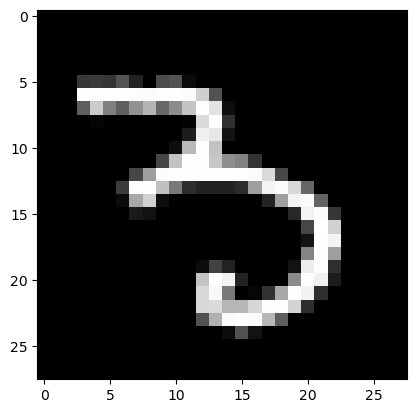

In [20]:
example = X_test[0:,0].reshape(784,1)
train.predict_probability(example)

Prediction:  [5]


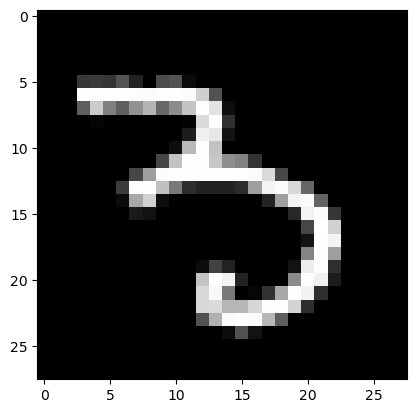

In [21]:
train.predict_label(example)

In [22]:
test_predictions = train.make_predictions(X_test)

In [23]:
train.get_accuracy(test_predictions, Y_test)

[5 6 4 6 7 8 0 0 7 5 3 6 3 1 1 6 9 3 9 6 8 2 3 5 0 2 0 5 1 6 2 3 6 1 0 2 1
 7 8 9 9 2 9 1 7 0 7 6 9 8 3 1 6 7 6 1 0 7 9 8 1 1 5 4 6 7 4 2 6 6 6 2 3 3
 0 8 4 4 5 1 1 3 5 0 9 8 5 9 7 4 7 5 2 5 0 8 9 4 7 3 2 6 9 3 7 8 3 7 6 3 1
 0 1 2 0 1 1 2 2 3 8 5 3 4 6 6 2 2 5 7 1 1 9 6 5 8 7 0 3 4 3 0 4 0 3 8 7 9
 1 8 2 1 5 5 6 7 6 0 9 1 2 8 3 3 8 7 3 1 2 6 2 9 5 7 7 4 0 3 5 8 7 2 4 5 6
 2 6 3 1 9 4 6 2 2 5 4 2 4 9 4 6 7 6 7 9 4 4 9 9 7 4 7 6 8 3 2 4 5 6 9 2 4
 0 1 0 3 7 1 3 6 3 8 7 2 7 4 4 4 6 5 8 4 5 0 9 5 7 0 3 0 1 5 8 3 8 3 7 4 6
 3 3 0 3 6 0 2 3 5 3 7 3 5 0 8 9 0 8 5 1 8 1 7 8 0 4 9 7 6 8 3 8 7 0 4 5 2
 4 3 1 7 2 9 0 2 5 0 8 6 3 3 3 3 1 1 1 2 6 0 5 3 1 7 8 3 4 4 2 8 2 9 9 1 3
 7 6 7 3 8 0 6 0 8 3 8 7 5 4 1 5 8 0 3 0 3 6 1 6 8 9 4 8 1 0 4 1 2 0 9 0 3
 7 4 4 1 1 2 3 1 1 0 0 7 3 1 8 0 9 9 4 6 0 0 6 9 2 5 9 4 4 5 0 6 3 3 2 3 8
 1 8 0 7 6 4 8 5 6 9 6 9 9 6 4 7 0 2 1 2 9 6 6 7 5 4 5 7 3 2 7 1 9 4 7 2 9
 2 9 4 1 5 5 7 6 9 6 5 7 1 7 7 6 4 7 1 7 1 7 8 8 0 3 4 4 0 6 7 4 8 8 4 1 1
 1 6 1 2 6 9 6 4 2 8 5 8 

0.859